In [1]:
import pandas as pd
import numpy as np

import io
import os
import pathlib
import sys
sys.path.insert(0,'./support')

#import nbimporter
#from ipynb.fs.full.Wave_buoy_filter import Wave_buoy_filter
#import Wave_buoy_filter

#from ipynb.fs.defs.Wave_buoy_filter import get_Ireland_buoy_list
from ipynb.fs.defs.Coordinates import Coordinates

In [14]:
'''
    Comparing newly found buoy list with already existing buoy network.
'''
def buoy_list_crosscheck_all(df, buoy_network):
    report_df = pd.DataFrame()
    
    #df['Latitude'] = float_conversion(df['Latitude'])
    #df['Longitude'] = float_conversion(df['Longitude'])
    
    #buoy_network['Latitude'] = float_conversion(buoy_network['Latitude'])
    #buoy_network['Longitude'] = float_conversion(buoy_network['Longitude'])
    
    #total station count 
    report_df['Total Count'] = [len(df.index)]
    
    #platforms that does not exist, newly found:
    df_exist,new_count = find_new_platforms(df, buoy_network)
    report_df['New buoys'] = [new_count]
    
    display(report_df)
    print('Already existing buoys are listed below:')
    display(df_exist)
    #print('New buoys are listed below:')
    #display(df_new)
    
    return df_exist

In [3]:
'''
    Inside list comparison, finding unique or duplicated coordinates.
'''
def buoy_list_statistics(df):
    report_df = pd.DataFrame()
    
    #df['Latitude'] = float_conversion(df['Latitude'])
    #df['Longitude'] = float_conversion(df['Longitude'])
    
    #total station count 
    report_df['Total Count'] = [len(df.index)]
    
    #similar&unique coordinates
    similar_buoys, similar_count = similar_coordinates(df)
    
    #unique values
    unique_df = unique_points(df)
    report_df['Unique Coordinates(absolute)'] = [len(unique_df.index)]
    
    report_df['Duplicated Coordinates'] = [similar_count]
    
    #duplicated coordinates
    #duplicated_df = duplicated_coordinates(df)
    #report_df['Duplicated Coordinates'] = [len(duplicated_df.index)]
    
    #a = df.apply(lambda x: find_near_points(df, Coordinates(float(x['Latitude']), float(x['Longitude']))), axis=1)
    # = a.apply(lambda x: pd.DataFrame(x.values[0])).reset_index().drop('level_1', axis = 1)
    
    display(report_df)
    if not similar_buoys.empty:
        print('Buoys with same or similar coordinates are shown below:')
        display(similar_buoys.sort_values(by=['Latitude']))
    return similar_buoys.sort_values(by=['Latitude'])

In [4]:
def find_new_platforms(df_new, df_all):

    exist_all = pd.DataFrame() 
    #new = pd.DataFrame()
    new_count=len(df_new)

    for index,row in df_new.iterrows():
        coord= Coordinates(row['Latitude'], row['Longitude'])
        df_all['distance'] = df_all.apply(lambda x: coord.distance(Coordinates(x['Latitude'],x['Longitude'])), axis = 1)
        
        #df_new['New'] = df_all[df_all['distance'] < 3]
        exist = df_all[df_all['distance'] < 3]
        
        #row['distance'] = exist['distance']
            
        if not exist.empty:
            new_count -= 1
            exist['list'] = 'current buoy list'
            row['list'] = 'new list'
            if not exist_all.empty:
                exist_all = exist_all.append(exist)
                exist_all = exist_all.append(row)
            else: 
                exist_all = exist
                exist_all = exist_all.append(row)
            
    return exist_all,new_count               
  

In [5]:
def float_conversion(column):

    column = column.astype(str).str.replace(',','.')
    return column.apply(lambda x: float(x)).round(2)

In [6]:
def similar_coordinates(df):
    similar = pd.DataFrame() 
    #new = pd.DataFrame()
    similar_count=0
    #unique_count=0
    for index,row in df.iterrows():
        coord= Coordinates(row['Latitude'], row['Longitude'])
        df['distance'] = df.apply(lambda x: coord.distance(Coordinates(x['Latitude'],x['Longitude'])), axis = 1)
        
        #df_new['New'] = df_all[df_all['distance'] < 3]
        exist = df[df['distance'] < 3]
        
        #row['distance'] = exist['distance']
        if len(exist) > 1:
            similar_count += len(exist)
            df=df.drop(exist.index)
            if not similar.empty:
                similar = similar.append(exist)
            else: 
                similar = exist
                
        #unique_count+=1
        
    return similar,similar_count  

In [7]:
def unique_points(df):
    #return df[df.groupby(['Latitude','Longitude'])]
    #return df[df[['Latitude','Longitude']].unique]
    #return df[['Latitude','Longitude']].nunique()
    return df.drop_duplicates(subset=['Latitude','Longitude'])

In [8]:
%run Wave_buoy_filter.ipynb

In [9]:
buoy_list = get_buoy_network()

In [ ]:
ireland= get_Ireland_buoy_list()

In [42]:
buoy_list_crosscheck_all(ireland, buoy_list)

/home/jupyter-busra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Total Count,New buoys
0,5,0


Already existing buoys are listed below:


,Station_ID,Latitude,Longitude,Grid,Station_Name,distance,list
0,AMETS Berth A Wave Buoy,-10.27,54.29,"Area: Ireland_MarineInstitute, Main function: ...",AMETS Berth A Wave Buoy,0.000000,current buoy list
0,AMETS Berth A Wave Buoy,-10.27,54.29,"Area: Ireland_MarineInstitute, Main function: ...",NaN,179.137690,new list
1,AMETS Berth B Wave Buoy,-10.14,54.23,"Area: Ireland_MarineInstitute, Main function: ...",AMETS Berth B Wave Buoy,0.000000,current buoy list
1,AMETS Berth B Wave Buoy,-10.14,54.23,"Area: Ireland_MarineInstitute, Main function: ...",NaN,168.281471,new list
2,AMETS Berth C Wave Buoy,-10.09,54.22,"Area: Ireland_MarineInstitute, Main function: ...",AMETS Berth C Wave Buoy,0.000000,current buoy list
2,AMETS Berth C Wave Buoy,-10.09,54.22,"Area: Ireland_MarineInstitute, Main function: ...",NaN,165.704383,new list
3,SmartBay Wave Buoy,-9.27,53.23,"Area: Ireland_MarineInstitute, Main function: ...",SmartBay Wave Buoy,0.000000,current buoy list
3,SmartBay Wave Buoy,-9.27,53.23,"Area: Ireland_MarineInstitute, Main function: ...",NaN,70.308282,new list
4,Westwave Wave Buoy,-9.70,52.76,"Area: Ireland_MarineInstitute, Main function: ...",Westwave Wave Buoy,0.000000,current buoy list
4,Westwave Wave Buoy,-9.70,52.76,"Area: Ireland_MarineInstitute, Main function: ...",NaN,0.000000,new list


In [45]:
buoy_list_statistics(ireland)

,Total Count,Unique Coordinates,Duplicated Coordinates
0,5,5,0


,Station_ID,Latitude,Longitude,Grid,distance


In [30]:
ireland2 = get_Ireland_buoy_list_raw()

In [31]:
ireland2

,Station_ID,Latitude,Longitude,Grid
0,AMETS Berth A Wave Buoy,-10.2715,54.2856,"Area: Ireland_MarineInstitute, Main function: ..."
1,AMETS Berth B Wave Buoy,-10.146,54.231,"Area: Ireland_MarineInstitute, Main function: ..."
2,AMETS Berth B Wave Buoy,-10.14245,54.231766,"Area: Ireland_MarineInstitute, Main function: ..."
3,AMETS Berth C Wave Buoy,-10.092,54.225,"Area: Ireland_MarineInstitute, Main function: ..."
4,SmartBay Wave Buoy,-9.271,53.227,"Area: Ireland_MarineInstitute, Main function: ..."
5,SmartBay Wave Buoy,-9.268115,53.228232999999996,"Area: Ireland_MarineInstitute, Main function: ..."
6,SmartBay Wave Buoy,-9.267000000000001,53.227,"Area: Ireland_MarineInstitute, Main function: ..."
7,Westwave Wave Buoy,-9.703683,52.754684,"Area: Ireland_MarineInstitute, Main function: ..."
8,Westwave Wave Buoy,-9.70335,52.756381999999995,"Area: Ireland_MarineInstitute, Main function: ..."


In [73]:
buoy_list_statistics(ireland2)

,Total Count,Unique Coordinates(absolute),Duplicated Coordinates
0,9,7,7


Buoys with same or similar coordinates are shown below:


,Station_ID,Latitude,Longitude,Grid,distance
1,AMETS Berth B Wave Buoy,-10.15,54.23,"Area: Ireland_MarineInstitute, Main function: ...",0.000000
2,AMETS Berth B Wave Buoy,-10.14,54.23,"Area: Ireland_MarineInstitute, Main function: ...",1.111949
7,Westwave Wave Buoy,-9.70,52.75,"Area: Ireland_MarineInstitute, Main function: ...",0.000000
8,Westwave Wave Buoy,-9.70,52.76,"Area: Ireland_MarineInstitute, Main function: ...",1.096052
4,SmartBay Wave Buoy,-9.27,53.23,"Area: Ireland_MarineInstitute, Main function: ...",0.000000
5,SmartBay Wave Buoy,-9.27,53.23,"Area: Ireland_MarineInstitute, Main function: ...",0.000000
6,SmartBay Wave Buoy,-9.27,53.23,"Area: Ireland_MarineInstitute, Main function: ...",0.000000


In [20]:
cdip = get_CDIP_buoy_list()

In [15]:
#ireland and ndbc are in the list 

buoy_list_crosscheck_all(cdip, buoy_list)

/home/jupyter-busra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Total Count,New buoys
0,218,216


Already existing buoys are listed below:


,Depth(m),Grid,Latitude,Longitude,Owner,Sensor,Station_ID,Station_Name,distance,list
44,NaN,"Area: NDBC, Main function: get_NDBC_data, Dire...",36.60,-74.83,NDBC,AirtemperatureBarometricpressureCurrentsWatert...,44014,"VIRGINIA BEACH 64 NM East of Virginia Beach, VA",1.425913,current buoy list
208,49.0,"Area: California_CDIP, Main function: get_CDIP...",36.61,-74.84,NaN,NaN,171,"VIRGINIA BEACH OFFSHORE, VA",NaN,new list
74,NaN,"Area: NDBC, Main function: get_NDBC_data, Dire...",37.75,-122.84,NDBC,AirtemperatureBarometricpressureWatertemperatu...,46026,"SAN FRANCISCO - 18NM West of San Francisco, CA",0.879207,current buoy list
215,53.0,"Area: California_CDIP, Main function: get_CDIP...",37.75,-122.83,NaN,NaN,180,"SAN FRANCISCO OFFSHORE, CA",NaN,new list


In [21]:
df = buoy_list_statistics(cdip)
df.loc[df.Station_ID == 79]

,Total Count,Unique Coordinates(absolute),Duplicated Coordinates
0,169,156,56


Buoys with same or similar coordinates are shown below:


,Station_ID,Station_Name,Latitude,Longitude,Depth(m),Grid,distance
112,77,"KAHULUI, HI",20.90,-156.47,14.46,"Area: California_CDIP, Main function: get_CDIP...",0.000000
114,79,"KAHULUI HARBOR, HI",20.90,-156.48,9.34,"Area: California_CDIP, Main function: get_CDIP...",1.038788
85,60,"BARBERS POINT HARBOR, HI",21.32,-158.12,14.00,"Area: California_CDIP, Main function: get_CDIP...",1.035852
81,59,"BARBERS POINT ENTRANCE, HI",21.32,-158.13,8.50,"Area: California_CDIP, Main function: get_CDIP...",0.000000
100,66,"BARBERS POINT EAST HARBOR, HI",21.33,-158.12,14.00,"Area: California_CDIP, Main function: get_CDIP...",1.519654
197,159,"BARBERS POINT OFFSHORE, HI",21.33,-158.15,82.00,"Area: California_CDIP, Main function: get_CDIP...",2.351191
170,132,"FERNANDINA BEACH, FL",30.71,-81.29,15.24,"Area: California_CDIP, Main function: get_CDIP...",1.466389
120,83,"KINGS BAY, GA",30.72,-81.30,14.94,"Area: California_CDIP, Main function: get_CDIP...",0.000000
0,1,"IMPERIAL BEACH, CA",32.58,-117.14,6.10,"Area: California_CDIP, Main function: get_CDIP...",0.000000
78,55,"IMPERIAL BEACH NORTH, CA",32.58,-117.14,10.24,"Area: California_CDIP, Main function: get_CDIP...",0.000000


,Station_ID,Station_Name,Latitude,Longitude,Depth(m),Grid,distance
114,79,"KAHULUI HARBOR, HI",20.9,-156.48,9.34,"Area: California_CDIP, Main function: get_CDIP...",1.038788


In [34]:
#inside list check

buoy_list_statistics(cdip)

,Total Count,Unique Coordinates(absolute),Duplicated Coordinates
0,218,162,113


Buoys with same or similar coordinates are shown below:


,Station_ID,Station_Name,Latitude,Longitude,Depth(m),Grid,distance
116,79,"KAHULUI HARBOR, HI",20.89,-156.47,3.71,"Area: California_CDIP, Main function: get_CDIP...",1.111949
115,79,"KAHULUI HARBOR, HI",20.90,-156.47,2.92,"Area: California_CDIP, Main function: get_CDIP...",0.000000
112,77,"KAHULUI, HI",20.90,-156.47,14.46,"Area: California_CDIP, Main function: get_CDIP...",0.000000
114,79,"KAHULUI HARBOR, HI",20.90,-156.48,9.34,"Area: California_CDIP, Main function: get_CDIP...",1.038788
117,79,"KAHULUI HARBOR, HI",20.90,-156.47,13.80,"Area: California_CDIP, Main function: get_CDIP...",0.000000
...,...,...,...,...,...,...,...
54,35,"COQUILLE RIVER, OR",43.12,-124.44,10.97,"Area: California_CDIP, Main function: get_CDIP...",0.000000
76,54,"LONG BEACH, WA",46.39,-124.07,9.77,"Area: California_CDIP, Main function: get_CDIP...",0.000000
77,54,"LONG BEACH, WA",46.39,-124.07,9.77,"Area: California_CDIP, Main function: get_CDIP...",0.000000
34,24,"SILVER BAY, MN",47.33,-91.25,8.84,"Area: California_CDIP, Main function: get_CDIP...",0.000000


In [67]:
#print(cdip.sort_values(by='Station_Name'))
#print(ndbc.sort_values(by='Station_Name'))

In [10]:
ndbc = get_NDBC_buoy_list()

In [37]:
ndbc

,Station_ID,Station_Name,Latitude,Longitude,Grid
0,32012,Woods Hole Stratus Wave Station,-19.42,-85.08,"Area: NDBC, Main function: get_NDBC_data, Dire..."
1,41001,EAST HATTERAS - 150 NM East of Cape Hatteras,34.72,-72.32,"Area: NDBC, Main function: get_NDBC_data, Dire..."
2,41002,SOUTH HATTERAS - 225 NM South of Cape Hatteras,31.99,-74.96,"Area: NDBC, Main function: get_NDBC_data, Dire..."
3,41004,"EDISTO - 41 NM Southeast of Charleston, SC",32.50,-79.10,"Area: NDBC, Main function: get_NDBC_data, Dire..."
4,41008,"GRAYS REEF - 40 NM Southeast of Savannah, GA",31.40,-80.87,"Area: NDBC, Main function: get_NDBC_data, Dire..."
...,...,...,...,...,...
337,SLMN2,Lake Mohave - South,35.39,-114.62,"Area: NDBC, Main function: get_NDBC_data, Dire..."
338,SMBS1,"Springmaid pier, SC",33.66,-78.92,"Area: NDBC, Main function: get_NDBC_data, Dire..."
339,SPLL1,"South Timbalier Block 52, LA / CSI06",28.87,-90.48,"Area: NDBC, Main function: get_NDBC_data, Dire..."
340,SSBN7,Sunset Beach Nearshore Waves (SUN2WAVE),33.84,-78.48,"Area: NDBC, Main function: get_NDBC_data, Dire..."


In [15]:
#all buoys except ndbc

df = buoy_list_crosscheck_all(ndbc, buoy_list)
df

/home/jupyter-busra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Total Count,New buoys
0,342,90


Already existing buoys are listed below:


,Station_Name,Latitude,Longitude,Grid,Station_ID,Depth(m),LastDataMeasured,distance,list
243,41004,32.50,-79.10,"Area: EMODnet_Physics, Main function: get_Emod...",27551,NaN,2020/07/07 06:20,0.000000,current buoy list
3,"EDISTO - 41 NM Southeast of Charleston, SC",32.50,-79.10,"Area: NDBC, Main function: get_NDBC_data, Dire...",41004,NaN,NaN,NaN,new list
244,41008,31.40,-80.87,"Area: EMODnet_Physics, Main function: get_Emod...",27552,NaN,2020/07/07 05:50,0.000000,current buoy list
4,"GRAYS REEF - 40 NM Southeast of Savannah, GA",31.40,-80.87,"Area: NDBC, Main function: get_NDBC_data, Dire...",41008,NaN,NaN,NaN,new list
265,41116,28.52,-80.19,"Area: EMODnet_Physics, Main function: get_Emod...",27573,NaN,2017/09/09 15:30,1.480230,current buoy list
...,...,...,...,...,...,...,...,...,...
161,"SCRIPPS NEARSHORE, CA",32.87,-117.27,"Area: California_CDIP, Main function: get_CDIP...",201,38.71,NaN,0.933931,current buoy list
392,46254,32.87,-117.27,"Area: EMODnet_Physics, Main function: get_Emod...",27700,NaN,2020/07/06 13:56,0.933931,current buoy list
324,"La Jolla, CA (073)",32.87,-117.26,"Area: NDBC, Main function: get_NDBC_data, Dire...",LJPC1,NaN,NaN,NaN,new list
669,41119,33.84,-78.48,"Area: EMODnet_Physics, Main function: get_Emod...",755688,NaN,2020/07/06 13:17,0.000000,current buoy list


,Station_Name,Latitude,Longitude,Grid,Station_ID,Depth(m),LastDataMeasured,distance,list
243,41004,32.50,-79.10,"Area: EMODnet_Physics, Main function: get_Emod...",27551,NaN,2020/07/07 06:20,0.000000,current buoy list
3,"EDISTO - 41 NM Southeast of Charleston, SC",32.50,-79.10,"Area: NDBC, Main function: get_NDBC_data, Dire...",41004,NaN,NaN,NaN,new list
244,41008,31.40,-80.87,"Area: EMODnet_Physics, Main function: get_Emod...",27552,NaN,2020/07/07 05:50,0.000000,current buoy list
4,"GRAYS REEF - 40 NM Southeast of Savannah, GA",31.40,-80.87,"Area: NDBC, Main function: get_NDBC_data, Dire...",41008,NaN,NaN,NaN,new list
265,41116,28.52,-80.19,"Area: EMODnet_Physics, Main function: get_Emod...",27573,NaN,2017/09/09 15:30,1.480230,current buoy list
...,...,...,...,...,...,...,...,...,...
161,"SCRIPPS NEARSHORE, CA",32.87,-117.27,"Area: California_CDIP, Main function: get_CDIP...",201,38.71,NaN,0.933931,current buoy list
392,46254,32.87,-117.27,"Area: EMODnet_Physics, Main function: get_Emod...",27700,NaN,2020/07/06 13:56,0.933931,current buoy list
324,"La Jolla, CA (073)",32.87,-117.26,"Area: NDBC, Main function: get_NDBC_data, Dire...",LJPC1,NaN,NaN,NaN,new list
669,41119,33.84,-78.48,"Area: EMODnet_Physics, Main function: get_Emod...",755688,NaN,2020/07/06 13:17,0.000000,current buoy list


In [41]:
df.loc[df['Longitude'] == -85.08]

,Station_Name,Latitude,Longitude,Grid,Station_ID,Depth(m),LastDataMeasured,distance,list


In [30]:
#only ireland and cdip are in the list
buoy_list_crosscheck_all(ndbc, buoy_list)

/home/jupyter-busra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Total Count,New buoys
0,119,117


Already existing buoys are listed below:


,Station_Name,Latitude,Longitude,Grid,Station_ID,Depth(m),distance,list
190,"VIRGINIA BEACH OFFSHORE, VA",36.61,-74.84,"Area: California_CDIP, Main function: get_CDIP...",171.0,49.0,1.425913,current buoy list
325,"VIRGINIA BEACH 64 NM East of Virginia Beach, VA",36.60,-74.83,"Area: NDBC, Main function: get_NDBC_data, Dire...",44014,NaN,NaN,new list
193,"SAN FRANCISCO OFFSHORE, CA",37.75,-122.83,"Area: California_CDIP, Main function: get_CDIP...",180.0,53.0,0.879207,current buoy list
448,"SAN FRANCISCO - 18NM West of San Francisco, CA",37.75,-122.84,"Area: NDBC, Main function: get_NDBC_data, Dire...",46026,NaN,NaN,new list


In [33]:
buoy_list_statistics(ndbc)

,Total Count,Unique Coordinates(absolute),Duplicated Coordinates
0,119,119,0


In [39]:
emodnet= get_emodnet_buoy_list()

In [36]:
#only ireland and cdip are in the list

#emodnet = emodnet.sort_values(by='Latitude')
buoy_list_crosscheck_all(emodnet, buoy_list)

/home/jupyter-busra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Total Count,New buoys
0,637,580


Already existing buoys are listed below:


,Depth(m),Grid,LastDataMeasured,Latitude,Longitude,Station_ID,Station_Name,distance,list
123,14.94,"Area: California_CDIP, Main function: get_CDIP...",NaN,30.72,-81.30,83.0,"KINGS BAY, GA",0.955914,current buoy list
168,15.24,"Area: California_CDIP, Main function: get_CDIP...",NaN,30.71,-81.29,132.0,"FERNANDINA BEACH, FL",1.111949,current buoy list
75,NaN,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 04:26,30.72,-81.29,27569,41112,NaN,new list
177,9.80,"Area: California_CDIP, Main function: get_CDIP...",NaN,28.40,-80.53,143.0,"CAPE CANAVERAL NEARSHORE, FL",0.000000,current buoy list
76,NaN,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 04:26,28.40,-80.53,27570,41113,NaN,new list
...,...,...,...,...,...,...,...,...,...
77,10.00,"Area: California_CDIP, Main function: get_CDIP...",NaN,32.96,-117.28,51.0,"DEL MAR, CA",0.000000,current buoy list
180,17.00,"Area: California_CDIP, Main function: get_CDIP...",NaN,32.96,-117.28,153.0,"DEL MAR NEARSHORE, CA",0.000000,current buoy list
587,NaN,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 04:00,32.96,-117.28,969399,46266,NaN,new list
220,33.53,"Area: California_CDIP, Main function: get_CDIP...",NaN,29.02,-89.83,247.0,"GRAND ISLE OUTER, LA",0.000000,current buoy list


In [40]:
#EMODnet
# ireland, cdip, ndbc

buoy_list_crosscheck_all(emodnet, buoy_list)

/home/jupyter-busra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Total Count,New buoys
0,637,511


Already existing buoys are listed below:


,Depth(m),Grid,LastDataMeasured,Latitude,Longitude,Station_ID,Station_Name,distance,list
225,NaN,"Area: NDBC, Main function: get_NDBC_data, Dire...",NaN,32.50,-79.10,41004,"EDISTO - 41 NM Southeast of Charleston, SC",0.000000,current buoy list
57,NaN,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 04:40,32.50,-79.10,27551,41004,NaN,new list
226,NaN,"Area: NDBC, Main function: get_NDBC_data, Dire...",NaN,31.40,-80.87,41008,"GRAYS REEF - 40 NM Southeast of Savannah, GA",0.000000,current buoy list
58,NaN,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 03:50,31.40,-80.87,27552,41008,NaN,new list
230,NaN,"Area: NDBC, Main function: get_NDBC_data, Dire...",NaN,33.43,-77.75,41013,"Frying Pan Shoals, NC",1.448273,current buoy list
...,...,...,...,...,...,...,...,...,...
77,10.00,"Area: California_CDIP, Main function: get_CDIP...",NaN,32.96,-117.28,51,"DEL MAR, CA",0.000000,current buoy list
180,17.00,"Area: California_CDIP, Main function: get_CDIP...",NaN,32.96,-117.28,153,"DEL MAR NEARSHORE, CA",0.000000,current buoy list
587,NaN,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 04:00,32.96,-117.28,969399,46266,NaN,new list
220,33.53,"Area: California_CDIP, Main function: get_CDIP...",NaN,29.02,-89.83,247,"GRAND ISLE OUTER, LA",0.000000,current buoy list


In [44]:
#only ndbc in the list
buoy_list_crosscheck_all(emodnet, buoy_list)

/home/jupyter-busra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Total Count,New buoys
0,637,565


Already existing buoys are listed below:


,Grid,LastDataMeasured,Latitude,Longitude,Station_ID,Station_Name,distance,list
2,"Area: NDBC, Main function: get_NDBC_data, Dire...",NaN,32.50,-79.10,41004,"EDISTO - 41 NM Southeast of Charleston, SC",0.000000,current buoy list
57,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 04:40,32.50,-79.10,27551,41004,7059.451456,new list
3,"Area: NDBC, Main function: get_NDBC_data, Dire...",NaN,31.40,-80.87,41008,"GRAYS REEF - 40 NM Southeast of Savannah, GA",0.000000,current buoy list
58,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 03:50,31.40,-80.87,27552,41008,7257.517817,new list
7,"Area: NDBC, Main function: get_NDBC_data, Dire...",NaN,33.43,-77.75,41013,"Frying Pan Shoals, NC",1.448273,current buoy list
...,...,...,...,...,...,...,...,...
406,"Area: EMODnet_Physics, Main function: get_Emod...",2015/12/01 00:00,23.56,-153.90,35484,51100,10930.439550,new list
6,"Area: NDBC, Main function: get_NDBC_data, Dire...",NaN,30.04,-80.53,41012,"St. Augustine, FL 40NM ENE of St Augustine, FL",0.000000,current buoy list
408,"Area: EMODnet_Physics, Main function: get_Emod...",2014/02/01 00:00,30.04,-80.53,36072,41012,7359.946752,new list
10,"Area: NDBC, Main function: get_NDBC_data, Dire...",NaN,34.21,-76.95,41036,"Onslow Bay Outer, NC",0.000000,current buoy list


In [41]:
buoy_list_statistics(emodnet)

,Total Count,Unique Coordinates(absolute),Duplicated Coordinates
0,637,593,123


Buoys with same or similar coordinates are shown below:


,Grid,LastDataMeasured,Latitude,Longitude,Station_ID,Station_Name,distance
37,"Area: EMODnet_Physics, Main function: get_Emod...",2020/02/21 12:30,14.18,-60.93,17361,4100099,0.00000
417,"Area: EMODnet_Physics, Main function: get_Emod...",2019/09/18 02:30,14.18,-60.93,3667,41099,0.00000
415,"Area: EMODnet_Physics, Main function: get_Emod...",2019/09/13 05:30,14.55,-61.10,3665,41097,0.00000
572,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 06:00,14.55,-61.10,957008,4100097,0.00000
36,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 05:30,14.89,-61.11,17360,4100098,0.00000
...,...,...,...,...,...,...,...
438,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/28 22:00,58.94,19.16,434,HuvudskarOst,1.25126
386,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 05:50,61.20,2.27,33231,Gullfaks-C,0.00000
411,"Area: EMODnet_Physics, Main function: get_Emod...",2018/05/08 12:56,61.20,2.27,365107,GullfaksC,0.00000
405,"Area: EMODnet_Physics, Main function: get_Emod...",2015/12/01 00:00,71.76,-167.95,35483,48216,0.00000


In [21]:
def duplicated_coordinates(df):
    return df[df.duplicated(subset=['Latitude','Longitude'], keep=False)]
    #return df[df.duplicated(subset=['Latitude','Longitude'], keep='first')]

#duplicated_coordinates(emodnet)


In [22]:
def find_near_points(df, coordinates): #within 2 km distance

    #c = Coordinates(coordinates.Latitude, coordinates.Longitude)
    points_df= df[df.apply(lambda x: is_close((Coordinates(float(x['Latitude']), float(x['Longitude']))), coordinates), axis=1)]
    
    return points_df

In [23]:
def is_close(coord1, coord2, limit = 2):
    #c1 = Coordinates(coord1.Latitude, coord1.Longitude)
    #c2 = Coordinates(coord2.Latitude, coord2.Longitude)
    
    #abs(c1-c2)

    return coord1.distance(coord2) < 2

In [24]:
def innerlist_check_coordinates(df):
    duplicate = pd.DataFrame()
    count = len(df[df.duplicated(subset=['Latitude','Longitude'], keep='first')])
    df = df[df.duplicated(subset=['Latitude','Longitude'], keep=False)]        
    #df = x[x.duplicated(subset=['Latitude','Longitude'], keep='first')]     
    #df = x[x.duplicated(subset=['Latitude','Longitude'], keep='last')]      

    #df = x[x.duplicated(subset=['Station_Name'], keep=False)]
    if not df.empty:
        df=df.sort_values(by=['Latitude'])
        
        return df
    #df['Grid'].loc[df['Grid'].apply(lambda x: 'California_CDIP' in (x))]
    #df.loc[df['Grid'].name=='California_CDIP']
    
    print('All the buoys in given list are distinct by having different coordinates each...')
    
    return 

In [6]:
emodnet['Latitude'] = float_conversion(emodnet['Latitude'])
emodnet['Longitude'] = float_conversion(emodnet['Longitude'])
    
#unique = emodnet.groupby(['Latitude', 'Longitude']).size()
#unique = x.groupby(['Latitude', 'Longitude'])

unique = emodnet[emodnet.apply(lambda x : len(x[''].split(" "))>=4,axis=1)]

NameError: name 'float_conversion' is not defined

In [49]:
buoy_list_statistics(emodnet)

NameError: name 'emodnet' is not defined

In [52]:
cdip = get_CDIP_buoy_list()
buoy_list_statistics(cdip)

NameError: name 'unique_points' is not defined

In [46]:

#find_near_points(emodnet, c)
a = cdip[cdip.apply(lambda x: find_near_points(cdip, Coordinates(float(x['Latitude']), float(x['Longitude']))), axis=1)]
a[0]

KeyError: 0

In [43]:
len(a)
type(a)
#a[1]

from scipy.spatial.distance import cdist

cdip['Latitude'] = float_conversion(cdip['Latitude'])
cdip['Longitude'] = float_conversion(cdip['Longitude'])

#print(type(zip(cdip['Latitude'],cdip['Longitude'])))
      
#dm = cdist(cdip[['Latitude','Longitude']], cdip[['Latitude','Longitude']], lambda u, v: Coordinates(u['Latitude'], u['Longitude']).distance(Coordinates(v['Latitude'], v['Longitude'])))
#dm

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [17]:
emodnet= get_emodnet_buoy_list()
#emodnet = emodnet.sort_values(by='Latitude')
buoy_list_crosscheck_all(emodnet, buoy_list)
#innerlist_check_coordinates(emodnet)

                                                  Grid  LastDataMeasured  \
195  Area: EMODnet_Physics, Main function: get_Emod...  2020/06/29 04:56   
205  Area: EMODnet_Physics, Main function: get_Emod...  2020/06/29 04:56   

     Latitude  Longitude  Station_ID Station_Name    New  
195     32.53    -117.43       27689        46232  False  
205     33.58    -118.18       27699        46253  False  
                                                  Grid  LastDataMeasured  \
0    Area: EMODnet_Physics, Main function: get_Emod...  2006/12/01 00:00   
1    Area: EMODnet_Physics, Main function: get_Emod...  2011/12/01 00:00   
2    Area: EMODnet_Physics, Main function: get_Emod...  2007/12/01 00:00   
3    Area: EMODnet_Physics, Main function: get_Emod...  2015/05/14 02:00   
4    Area: EMODnet_Physics, Main function: get_Emod...  2020/06/29 04:32   
..                                                 ...               ...   
632  Area: EMODnet_Physics, Main function: get_Emod...  2020/0

,Total Count,New buoys
0,637,635


,Grid,LastDataMeasured,Latitude,Longitude,Station_ID,Station_Name,New
0,"Area: EMODnet_Physics, Main function: get_Emod...",2006/12/01 00:00,57.22,11.57,10407,LasoOstWR,True
1,"Area: EMODnet_Physics, Main function: get_Emod...",2011/12/01 00:00,55.92,18.78,10586,SodraOstersjon,True
2,"Area: EMODnet_Physics, Main function: get_Emod...",2007/12/01 00:00,58.93,19.17,10818,HuvudskarOstWR,True
3,"Area: EMODnet_Physics, Main function: get_Emod...",2015/05/14 02:00,58.58,16.15,11194,HarsfjardenWR,True
4,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 04:32,55.20,7.16,11302,FINO3WR,True
...,...,...,...,...,...,...,...
632,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 07:00,53.48,-5.43,7342,62091,True
633,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 07:00,51.22,-10.55,7343,62092,True
634,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 07:00,55.00,-10.00,7344,62093,True
635,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 07:00,51.69,-6.70,7345,62094,True


In [57]:
emodnet= get_emodnet_buoy_list()
#emodnet = emodnet.sort_values(by='Latitude')
buoy_list_crosscheck_all(emodnet, buoy_list)
#innerlist_check_coordinates(emodnet)

                                                  Grid  LastDataMeasured  \
195  Area: EMODnet_Physics, Main function: get_Emod...  2020/06/29 04:56   
205  Area: EMODnet_Physics, Main function: get_Emod...  2020/06/29 04:56   

     Latitude  Longitude  Station_ID Station_Name    New  
195     32.53    -117.43       27689        46232  False  
205     33.58    -118.18       27699        46253  False  
                                                  Grid  LastDataMeasured  \
0    Area: EMODnet_Physics, Main function: get_Emod...  2006/12/01 00:00   
1    Area: EMODnet_Physics, Main function: get_Emod...  2011/12/01 00:00   
2    Area: EMODnet_Physics, Main function: get_Emod...  2007/12/01 00:00   
3    Area: EMODnet_Physics, Main function: get_Emod...  2015/05/14 02:00   
4    Area: EMODnet_Physics, Main function: get_Emod...  2020/06/29 04:32   
..                                                 ...               ...   
632  Area: EMODnet_Physics, Main function: get_Emod...  2020/0

,Total Count,New buoys
0,637,635


,Grid,LastDataMeasured,Latitude,Longitude,Station_ID,Station_Name,New
0,"Area: EMODnet_Physics, Main function: get_Emod...",2006/12/01 00:00,57.22,11.57,10407,LasoOstWR,True
1,"Area: EMODnet_Physics, Main function: get_Emod...",2011/12/01 00:00,55.92,18.78,10586,SodraOstersjon,True
2,"Area: EMODnet_Physics, Main function: get_Emod...",2007/12/01 00:00,58.93,19.17,10818,HuvudskarOstWR,True
3,"Area: EMODnet_Physics, Main function: get_Emod...",2015/05/14 02:00,58.58,16.15,11194,HarsfjardenWR,True
4,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 04:32,55.20,7.16,11302,FINO3WR,True
...,...,...,...,...,...,...,...
632,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 07:00,53.48,-5.43,7342,62091,True
633,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 07:00,51.22,-10.55,7343,62092,True
634,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 07:00,55.00,-10.00,7344,62093,True
635,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 07:00,51.69,-6.70,7345,62094,True


In [10]:
def find_duplicates(df):
    return df[df.duplicated(subset=['Latitude','Longitude'], keep=False)]

def get_unique_points(df):
    return df[df[['Latitude','Longitude']].unique()]

In [4]:
ireland = get_Ireland_buoy_list()

innerlist_check_coordinates(ireland)


All the buoys in given list are distinct by having different coordinates each...


In [13]:
emodnet

,Grid,LastDataMeasured,Latitude,Longitude,Station_ID,Station_Name
0,"Area: EMODnet_Physics, Main function: get_Emod...",2006/12/01 00:00,57.22,11.57,10407,LasoOstWR
1,"Area: EMODnet_Physics, Main function: get_Emod...",2011/12/01 00:00,55.92,18.78,10586,SodraOstersjon
2,"Area: EMODnet_Physics, Main function: get_Emod...",2007/12/01 00:00,58.93,19.17,10818,HuvudskarOstWR
3,"Area: EMODnet_Physics, Main function: get_Emod...",2015/05/14 02:00,58.58,16.15,11194,HarsfjardenWR
4,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 04:32,55.20,7.16,11302,FINO3WR
...,...,...,...,...,...,...
632,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 07:00,53.48,-5.43,7342,62091
633,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 07:00,51.22,-10.55,7343,62092
634,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 07:00,55.00,-10.00,7344,62093
635,"Area: EMODnet_Physics, Main function: get_Emod...",2020/06/29 07:00,51.69,-6.70,7345,62094


In [12]:

#emo_filter = emodnet[(emodnet[['Latitude','Longitude']]=='US') & (df_airports['type'].isin(['large_airport','medium_airport','small_airport']))]

def find_near_points(df, coordinates): #within 2 km distance

    #c = Coordinates(coordinates.Latitude, coordinates.Longitude)
    points_df= df[df.apply(lambda x: is_close((Coordinates(float(x['Latitude']), float(x['Longitude']))), coordinates), axis=1)]
    
    return points_df

c = Coordinates(57.23,11.59)
find_near_points(emodnet, c)
emodnet.apply(lambda x: find_near_points(emodnet, Coordinates(float(x['Latitude']), float(x['Longitude']))), axis=1)

df[['Latitude','Latitude']]

#emodnet[['Latitude','Longitude']].apply(lambda x: find_near_points(emodnet, x))

#emo_filter = emodnet[emodnet[['Latitude','Longitude']].apply(lambda x: x.)]        
#stations = buoy_network[buoy_network['Grid'].apply(lambda x: x.database == force)]


NameError: name 'emodnet' is not defined

In [ ]:
def closest_point(point, points):
    """ Find closest point from a list of points. """
    return points[cdist([point], points).argmin()]

dm = cdist(XA, XB, lambda u, v: u.distance(v))

In [6]:
def possible_new_platfomrs():
    
    return

In [ ]:
def distance_list(point, points):
    
    return points[]

In [1]:
def outlier_station():
    return

ImportError: The descartes package is required for plotting polygons in geopandas. You can install it using 'conda install -c conda-forge descartes' or 'pip install descartes'.

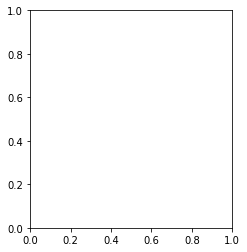

In [17]:
import geopandas
import matplotlib.pyplot as plt

df = get_buoy_network()
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))



In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [18]:
from shapely import wkt

df['geometry'] = df['geometry'].apply(wkt.loads)

TypeError: Only str is accepted.

In [ ]:
    #df_new['New'] = np.where((df_new['Latitude']==df_all['Latitude'].any())&(df_new['Longitude']==df_all['Longitude'].any()), False, True)
    
    #df_new['New'] = pd.Series(np.where(((abs(df_new['Latitude']-df_all['Latitude']) < 0.03).any()&(abs(df_new['Longitude']-df_all['Longitude'])<0.03).any()), False, True))
    #print(df_new[df_new['New'] == False])
    #any or all
    #df_new['New'] = np.where((Coordinates(df_new['Latitude'],df_new['Longitude']).distance(Coordinates(df_all['Latitude'].any(),df_all['Longitude'].any())) < 3), False, True)
    
    #df_new = df_new.apply(lambda x: Coordinates(x['Latitude'],x['Longitude']).distance(df_all[]), axis=1)
    #for index,row in df_new.iterrows():
     #   x = df_all.loc[abs(df_all['Latitude'].any()-row['Latitude']) < 0.03 & abs(df_all['Longitude'].any()-row['Longitude']) < 0.03]
      #  if x:
       #     print(x)
        
        
        
              
        #else:
         #   if not new.empty:
          #      new = new.append(row)
           # else:
            #    new = pd.DataFrame(row.values, columns=df_new.columns)
        #if len(exist) > 0:
            #report = report.append(row)

        #print(coord)
        #a = df_all.apply(lambda x: coord.distance(Coordinates(x['Latitude'],x['Longitude'])) < 3)
        #print(a)
    #df_new = pd.concat([df, buoy_network], axis=0, ignore_index=True, sort=False) 
